In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('Loan Status train.csv')

In [3]:
# printing the first few rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [5]:
# statistical measures
loan_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}})

C:\Users\amirh\AppData\Local\Temp\ipykernel_15920\4020264795.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [10]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [13]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

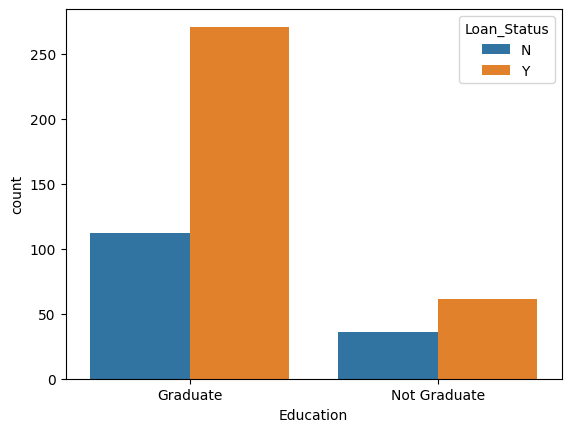

In [14]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

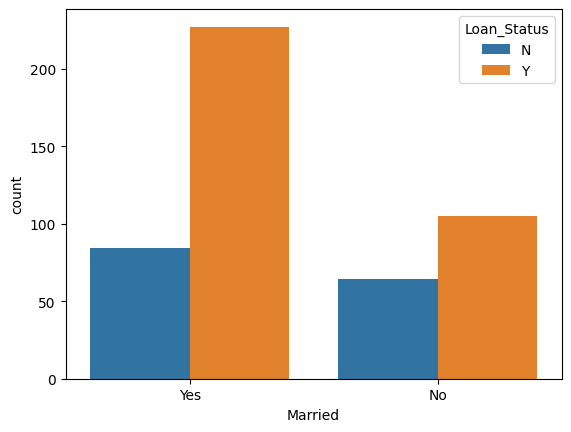

In [15]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [16]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\amirh\AppData\Local\Temp\ipykernel_15920\2432111705.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [18]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [19]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [20]:
print(Y)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


In [21]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [23]:
svm_classifier = svm.SVC(kernel='linear')

In [24]:
#training the support Vector Macine model
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
# accuracy score on training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8046875


In [26]:
# accuracy score on training data
svm_pred = svm_classifier.predict(X_test)
test_data_accuray = accuracy_score(svm_pred,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

c:\Users\amirh\OneDrive\Desktop\Amir Hamza lab file\ml_lab\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
X_train_prediction = log_reg.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7994791666666666


In [29]:
log_reg_pred = log_reg.predict(X_test)
test_data_accuray = accuracy_score(log_reg_pred,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
X_train_prediction = dt_model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [32]:
dt_model_pred = dt_model.predict(X_test)
test_data_accuray = accuracy_score(dt_model_pred,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.71875


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
X_train_prediction = rf_model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [35]:
rf_model_pred = rf_model.predict(X_test)
test_data_accuray = accuracy_score(rf_model_pred,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8020833333333334


In [36]:
from sklearn.metrics import accuracy_score, classification_report


# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_reg_pred))
print(classification_report(Y_test, log_reg_pred))

print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print(classification_report(Y_test, svm_pred))

Logistic Regression Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           N       0.85      0.57      0.68        30
           Y       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96

SVM Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           N       0.89      0.53      0.67        30
           Y       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96



In [37]:
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_model_pred))
print(classification_report(Y_test, dt_model_pred))

print("Random Forest Accuracy:", accuracy_score(Y_test, rf_model_pred))
print(classification_report(Y_test, rf_model_pred))

Decision Tree Accuracy: 0.71875
              precision    recall  f1-score   support

           N       0.54      0.67      0.60        30
           Y       0.83      0.74      0.78        66

    accuracy                           0.72        96
   macro avg       0.69      0.70      0.69        96
weighted avg       0.74      0.72      0.73        96

Random Forest Accuracy: 0.8020833333333334
              precision    recall  f1-score   support

           N       0.69      0.67      0.68        30
           Y       0.85      0.86      0.86        66

    accuracy                           0.80        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.80      0.80      0.80        96



C:\Users\amirh\AppData\Local\Temp\ipykernel_15920\2776658349.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


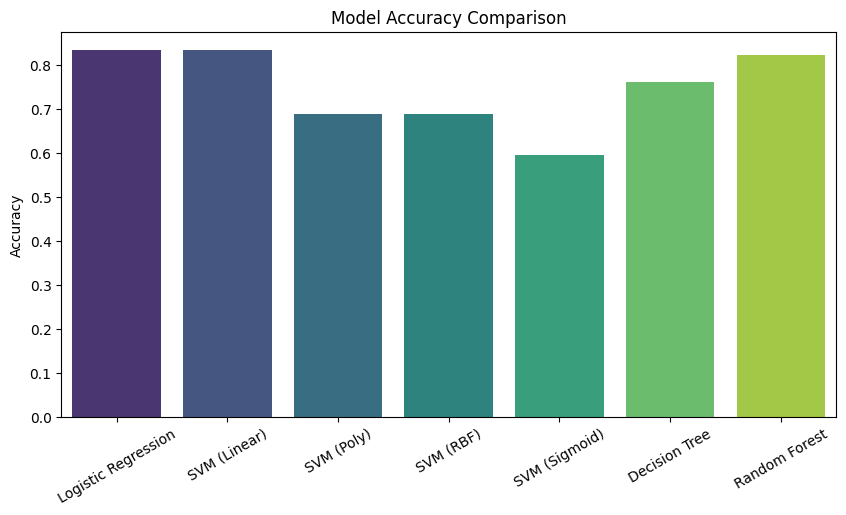

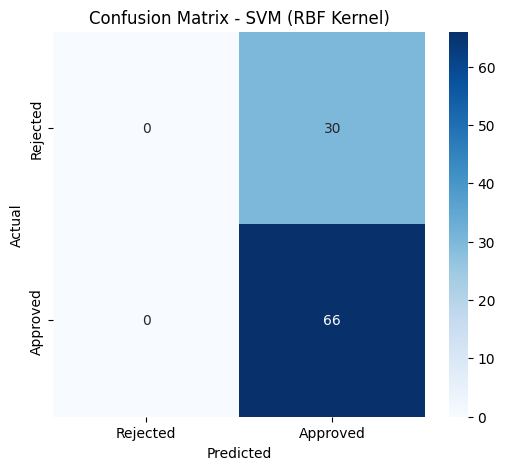

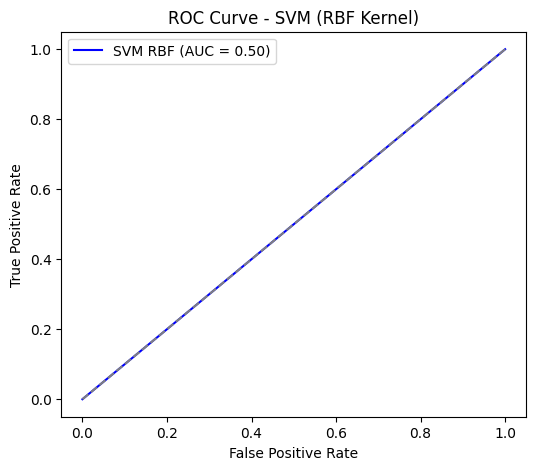

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Define SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_accuracies = []

# Train and evaluate SVM with different kernels
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, Y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    svm_accuracies.append(acc)

# Model accuracies
model_names = ['Logistic Regression', 'SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'SVM (Sigmoid)', 'Decision Tree', 'Random Forest']
accuracies = [0.8333] + svm_accuracies + [0.7604, 0.8229]

# 🔹 Plot Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.show()

# 🔹 Plot Confusion Matrix for the Best Model (SVM RBF in this case)
best_svm = SVC(kernel='rbf')
best_svm.fit(X_train, Y_train)
y_pred_best = best_svm.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (RBF Kernel)')
plt.show()

# 🔹 ROC Curve for SVM RBF
Y_test_binary = Y_test.map({'N': 0, 'Y': 1})
y_pred_best = np.where(y_pred_best == 'Y', 1, 0)

fpr, tpr, _ = roc_curve(Y_test_binary, y_pred_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'SVM RBF (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (RBF Kernel)')
plt.legend()
plt.show()


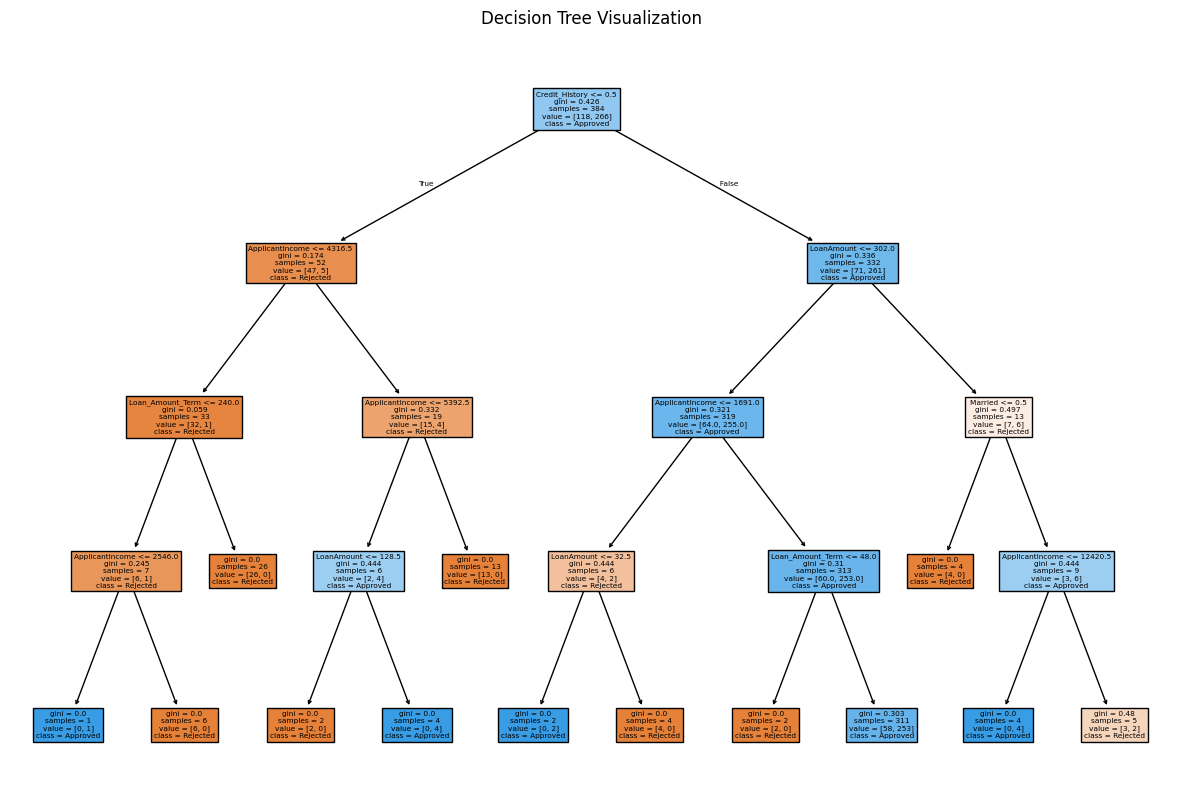

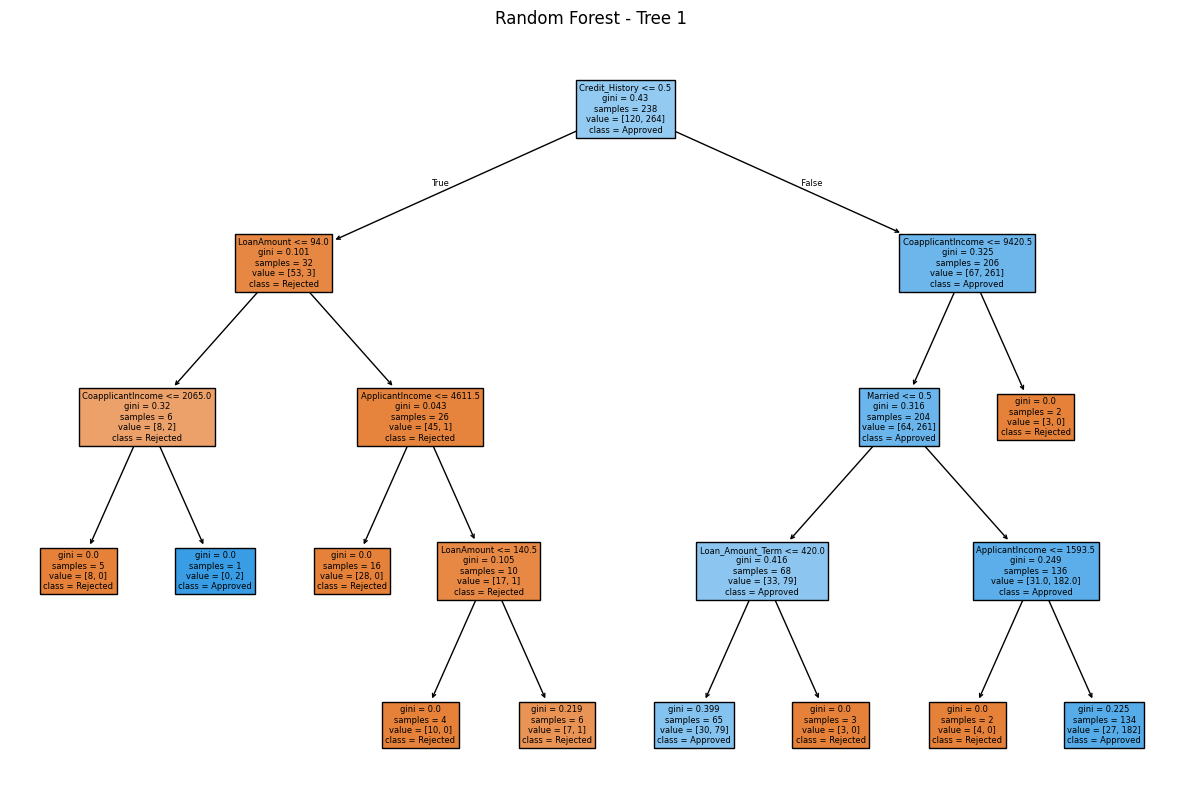

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4)  # Limit depth for better visualization
dt_model.fit(X_train, Y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X_train, Y_train)

# 🔹 Plot the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'])
plt.title("Decision Tree Visualization")
plt.show()

# 🔹 Plot One Tree from the Random Forest
plt.figure(figsize=(15,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'])
plt.title("Random Forest - Tree 1")
plt.show()
